In [39]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv(r'D:\time series of sale of product/perrin-freres-monthly-champagne-.csv')

In [4]:
df.head()

,Month,Perrin Freres monthly champagne sales millions ?64-?72
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0


In [5]:
df.columns=['Months','Sales']
df.head()

,Months,Sales
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0


In [6]:
df.shape

(107, 2)

In [7]:
df.isnull().sum()

Months    1
Sales     2
dtype: int64

In [8]:
df.tail()

,Months,Sales
102,1972-07,4298.0
103,1972-08,1413.0
104,1972-09,5877.0
105,NaN,NaN
106,Perrin Freres monthly champagne sales millions...,NaN


In [9]:
df.drop(106,axis=0,inplace=True)

In [10]:
df.drop(105,axis=0,inplace=True)

In [11]:
df.tail()

,Months,Sales
100,1972-05,4618.0
101,1972-06,5312.0
102,1972-07,4298.0
103,1972-08,1413.0
104,1972-09,5877.0


In [12]:
df.shape

(105, 2)

In [13]:
df.dtypes

Months     object
Sales     float64
dtype: object

In [14]:
df['Months']=pd.to_datetime(df['Months'])

In [15]:
df.dtypes

Months    datetime64[ns]
Sales            float64
dtype: object

In [16]:
df.head()

,Months,Sales
0,1964-01-01,2815.0
1,1964-02-01,2672.0
2,1964-03-01,2755.0
3,1964-04-01,2721.0
4,1964-05-01,2946.0


In [17]:
##In ML our s.no. is index
##In Time Series our month is index

In [18]:
df.set_index('Months',inplace=True)

In [19]:
df.head()

,Sales
Months,
1964-01-01,2815.0
1964-02-01,2672.0
1964-03-01,2755.0
1964-04-01,2721.0
1964-05-01,2946.0


In [20]:
df.describe()

,Sales
count,105.000000
mean,4761.152381
std,2553.502601
min,1413.000000
25%,3113.000000
50%,4217.000000
75%,5221.000000
max,13916.000000


# Visualize sales column

<AxesSubplot:xlabel='Months'>

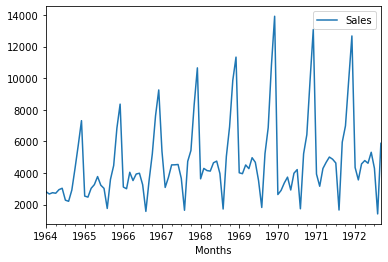

In [21]:
df.plot()

In [22]:
# seasonal data present
# on christmas the sales go up 

# Check if data is stationary or not

In [23]:
#adfuller test, p value < 0.05, data not stationary

!pip install statsmodels

In [24]:
from statsmodels.tsa.stattools import adfuller

In [25]:
# Hypothesis testing
# H0 (Null)= data not stationary
# H1 (Alternative)= data is stationary

In [26]:
adfuller(df['Sales'])

(-1.8335930563276184,
 0.36391577166024713,
 11,
 93,
 {'1%': -3.502704609582561,
  '5%': -2.8931578098779522,
  '10%': -2.583636712914788},
 1478.4633060594724)

In [27]:
def adfuller_test(sales):
    result=adfuller(sales)
    
    labels=['ADF test statistics', 'p-value', 'Lags used', 'Number of obs used']
    
    for value,label in zip(result,labels):
        print('{}:{}'.format(label,value))
    if result[1]<= 0.05:
        print('Strong evidence against null hypothesis,reject the null hypo,&data is stationary')
    else:
        print('Weak evidence against null hypothesis,accept the null hypo,&data is not stationary')
    

In [28]:
adfuller_test(df['Sales'])

ADF test statistics:-1.8335930563276184
p-value:0.36391577166024713
Lags used:11
Number of obs used:93
Weak evidence against null hypothesis,accept the null hypo,&data is not stationary


# Making non stationary data into stationary by differencing

In [29]:
df

,Sales
Months,
1964-01-01,2815.0
1964-02-01,2672.0
1964-03-01,2755.0
1964-04-01,2721.0
1964-05-01,2946.0
...,...
1972-05-01,4618.0
1972-06-01,5312.0
1972-07-01,4298.0


In [30]:
df['Sales'].shift(1)

Months
1964-01-01       NaN
1964-02-01    2815.0
1964-03-01    2672.0
1964-04-01    2755.0
1964-05-01    2721.0
               ...  
1972-05-01    4788.0
1972-06-01    4618.0
1972-07-01    5312.0
1972-08-01    4298.0
1972-09-01    1413.0
Name: Sales, Length: 105, dtype: float64

In [31]:
df['Sales First Difference'] = df['Sales'] - df['Sales'].shift(1)

In [32]:
#why taken shift(12),bcz basically year has 12 month cycle
df['Seasonal First Difference']=df['Sales']-df['Sales'].shift(12)

In [33]:
df.head(14)

,Sales,Sales First Difference,Seasonal First Difference
Months,,,
1964-01-01,2815.0,NaN,NaN
1964-02-01,2672.0,-143.0,NaN
1964-03-01,2755.0,83.0,NaN
1964-04-01,2721.0,-34.0,NaN
1964-05-01,2946.0,225.0,NaN
1964-06-01,3036.0,90.0,NaN
1964-07-01,2282.0,-754.0,NaN
1964-08-01,2212.0,-70.0,NaN
1964-09-01,2922.0,710.0,NaN


In [34]:
## Again test dickey fuller test on df['Sales First Difference']
adfuller_test(df['Seasonal First Difference'].dropna())

ADF test statistics:-7.626619157213164
p-value:2.060579696813685e-11
Lags used:0
Number of obs used:92
Strong evidence against null hypothesis,reject the null hypo,&data is stationary


<AxesSubplot:xlabel='Months'>

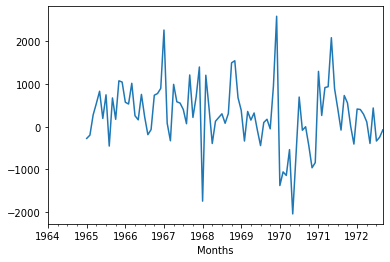

In [35]:
#now our p-value is less than 0.05 which basically says we are rejecting null hypo and accepting alternate hypo
#ie data is stationery
#if p-value is almost 0,then we have a wonderful stationery graph
df['Seasonal First Difference'].plot()

In [36]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
#Autocorrelation(plot_acf),Partial Autocorrelation(plot_pacf)

In [37]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

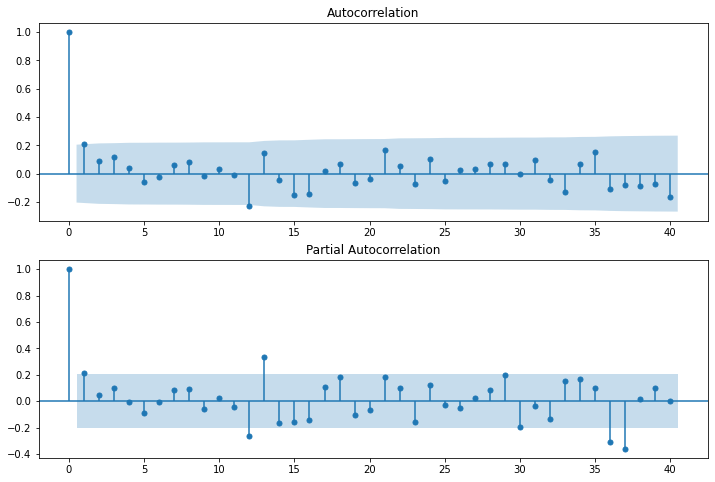

In [40]:

fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = plot_acf(df['Seasonal First Difference'].iloc[13:],lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = plot_pacf(df['Seasonal First Difference'].iloc[13:],lags=40,ax=ax2)

In [41]:
# For non-seasonal data
#p=1, d=1, q=0 or 1
from statsmodels.tsa.arima_model import ARIMA

In [42]:
model=ARIMA(df['Sales'],order=(1,1,1))
model_fit=model.fit()

D:\Anaconda\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.war

In [43]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D.Sales   No. Observations:                  104
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -951.126
Method:                       css-mle   S.D. of innovations           2227.262
Date:                Fri, 08 Oct 2021   AIC                           1910.251
Time:                        08:58:49   BIC                           1920.829
Sample:                    02-01-1964   HQIC                          1914.536
                         - 09-01-1972                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            22.7843     12.405      1.837      0.066      -1.529      47.098
ar.L1.D.Sales     0.4343      0.089      4.866      0.000       0.259       0.609
ma.L1.D.Sales    -1.0000      0.026    -38.503      0.000      -1.051      -0.949
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            2.3023           +0.0000j            2.3023            0.0000
MA.1            1.0000           +0.0000j            1.0000            0.0000
-----------------------------------------------------------------------------
"""

<AxesSubplot:xlabel='Months'>

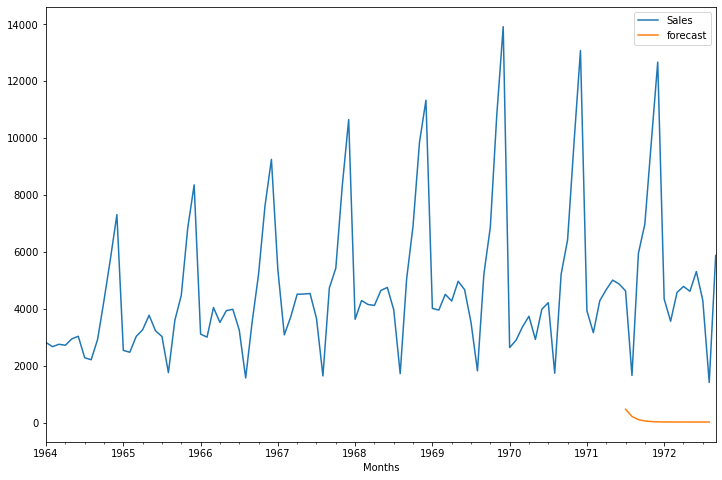

In [44]:
df['forecast']=model_fit.predict(start=90,end=103,dynamic=True)
df[['Sales','forecast']].plot(figsize=(12,8))

In [45]:
import statsmodels.api as sm

In [46]:
## note: when u have seasonal data, use SARIMAX over there..

In [47]:
#seasonal_order=(1,1,1,12)
#(p,d,q,shift_value)

In [48]:
model=sm.tsa.statespace.SARIMAX(df['Sales'],order=(1, 1, 1),seasonal_order=(1,1,1,12))
results=model.fit()

D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [49]:
#predicting from index 90 to 103
df['forecast']=results.predict(start=90,end=103,dynamic=True)


<AxesSubplot:xlabel='Months'>

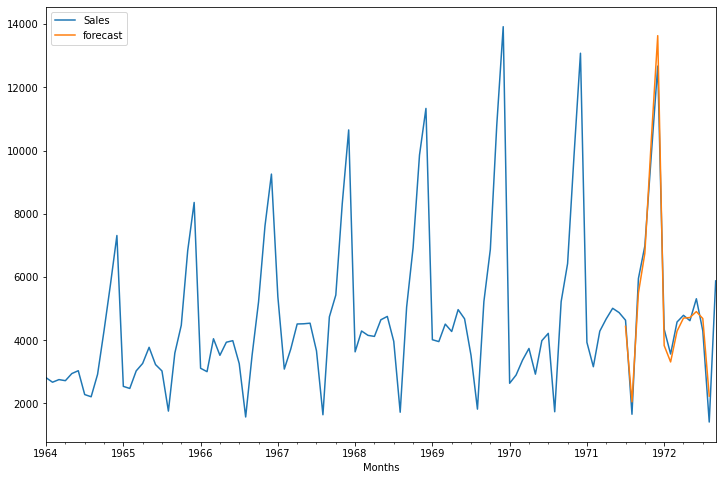

In [50]:
#blue line is original data anf orange is a forecasted data
df[['Sales','forecast']].plot(figsize=(12,8))

In [51]:
### to see how future predictions/projections looks like

In [52]:
from pandas.tseries.offsets import DateOffset

In [53]:
df.index[-1]

Timestamp('1972-09-01 00:00:00')

In [54]:
future_dates=[df.index[-1]+ DateOffset(months=x)for x in range(0,24)]

In [55]:
future_dates

[Timestamp('1972-09-01 00:00:00'),
 Timestamp('1972-10-01 00:00:00'),
 Timestamp('1972-11-01 00:00:00'),
 Timestamp('1972-12-01 00:00:00'),
 Timestamp('1973-01-01 00:00:00'),
 Timestamp('1973-02-01 00:00:00'),
 Timestamp('1973-03-01 00:00:00'),
 Timestamp('1973-04-01 00:00:00'),
 Timestamp('1973-05-01 00:00:00'),
 Timestamp('1973-06-01 00:00:00'),
 Timestamp('1973-07-01 00:00:00'),
 Timestamp('1973-08-01 00:00:00'),
 Timestamp('1973-09-01 00:00:00'),
 Timestamp('1973-10-01 00:00:00'),
 Timestamp('1973-11-01 00:00:00'),
 Timestamp('1973-12-01 00:00:00'),
 Timestamp('1974-01-01 00:00:00'),
 Timestamp('1974-02-01 00:00:00'),
 Timestamp('1974-03-01 00:00:00'),
 Timestamp('1974-04-01 00:00:00'),
 Timestamp('1974-05-01 00:00:00'),
 Timestamp('1974-06-01 00:00:00'),
 Timestamp('1974-07-01 00:00:00'),
 Timestamp('1974-08-01 00:00:00')]

In [56]:
from pandas.tseries.offsets import DateOffset

#creating additional dataset for 24 months,
future_dates=[df.index[-1]+ DateOffset(months=x)for x in range(0,24)]

In [59]:
future_datset_df=pd.DataFrame(index=future_dates[1:],columns=df.columns)

In [64]:
future_datset_df.tail()

,Sales,Sales First Difference,Seasonal First Difference,forecast
1974-04-01,NaN,NaN,NaN,NaN
1974-05-01,NaN,NaN,NaN,NaN
1974-06-01,NaN,NaN,NaN,NaN
1974-07-01,NaN,NaN,NaN,NaN
1974-08-01,NaN,NaN,NaN,NaN


In [66]:
future_df=pd.concat([df,future_datset_df])

<AxesSubplot:>

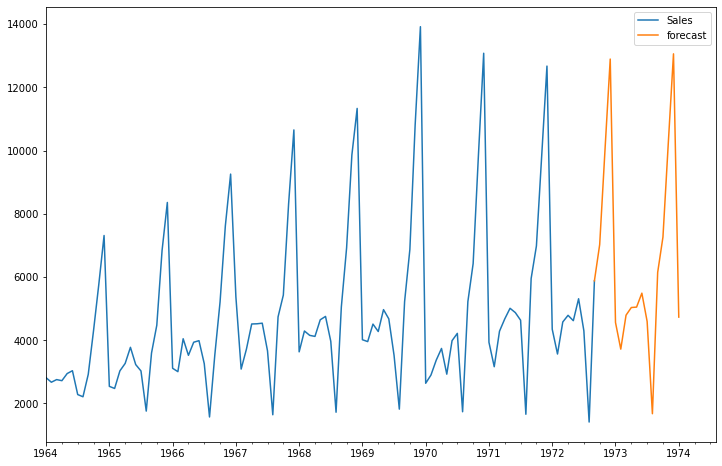

In [67]:
future_df['forecast'] = results.predict(start = 104, end = 120, dynamic= True)  
future_df[['Sales', 'forecast']].plot(figsize=(12, 8)) 